<center>
<h style="line-height: 0.5;">

# Applying Machine Learning to Gravitational Lens Modeling
## Mock Lens Tests

</h>
</center>

In [3]:
# imports all the modules needed

import numpy as np
import matplotlib.pyplot as plt
import pygravlens as gl

### Initials

In [3]:
# number of mock lenses
num_mock = 3 # this number SQUARED of mock lenses will be generated

# generates random einstein radii every time this is called... could pose an error
EinsArr = np.sort(np.random.uniform(1.0, 1.5, num_mock)) 

### Using SIS Model to Generate Lenses for Training Data

c:\Users\satya\Documents\GravLensing\pygravlens.py:1641: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


Here is the image array: 
 [[ 1.78001131e+00 -1.91729566e-08]
 [-2.57702711e-01  1.71922049e-09]
 [-3.38122604e-06 -1.66707098e-14]] 

Here is the magnification array: 
 [ 2.25201395e+00 -3.52265414e-01  7.16660313e-11] 

Here is the time delay array: 
 [0.         1.52828696 1.56099479]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.80434502e+00  1.03155005e-08]
 [-2.61225698e-01 -1.29407376e-09]
 [-3.38122532e-06 -1.04082759e-14]] 

Here is the magnification array: 
 [ 2.18164623e+00 -3.65430513e-01  7.16659845e-11] 

Here is the time delay array: 
 [0.         1.54917948 1.58233459]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.81450349e+00  3.26558239e-09]
 [-2.62696411e-01  8.31940187e-10]] 

Here is the magnification array: 
 [ 2.15482572 -0.37104088] 

Here is the time delay array: 
 [0.        1.5579014]

----------------------------Next Mock Lens------------------

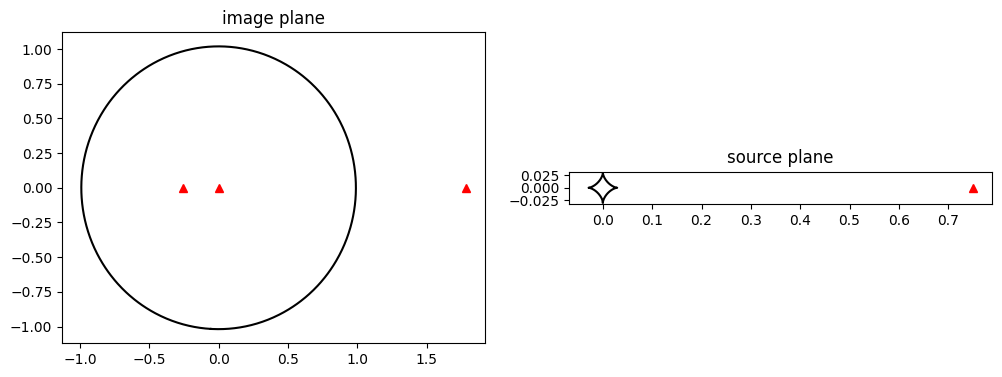

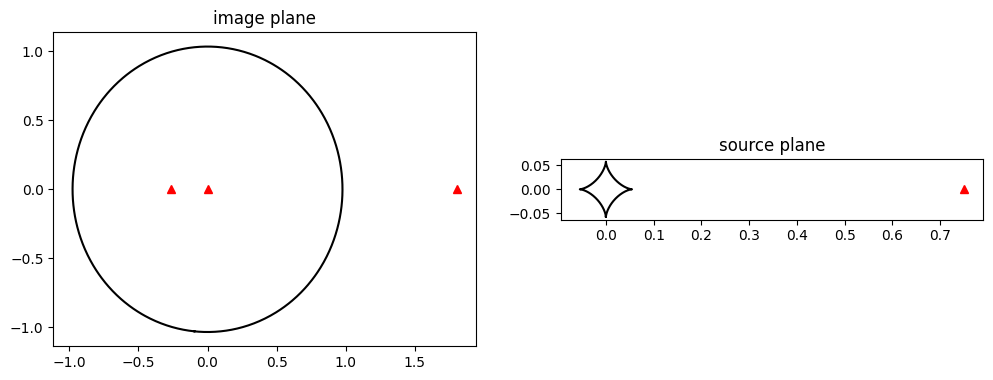

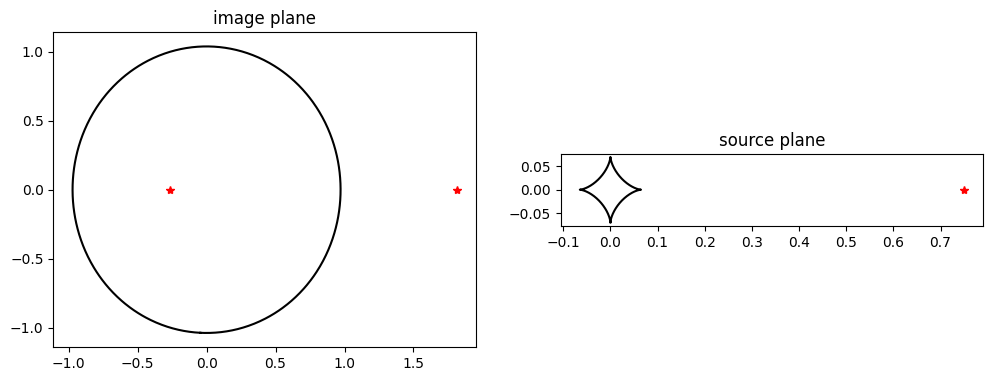

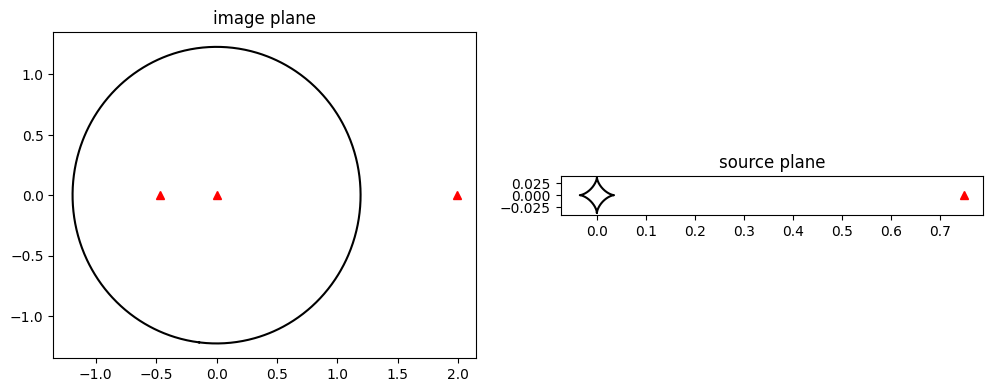

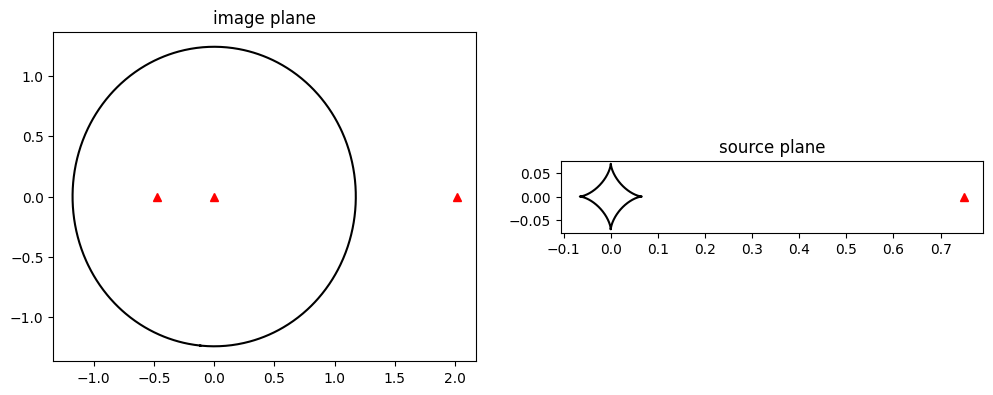

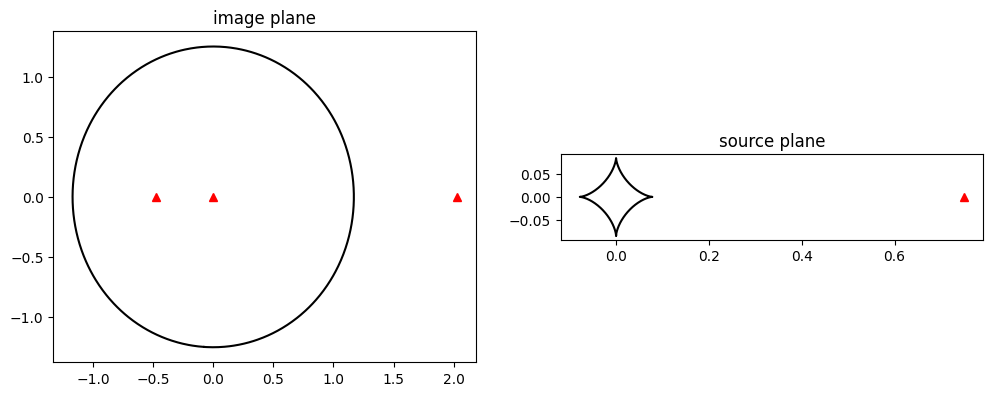

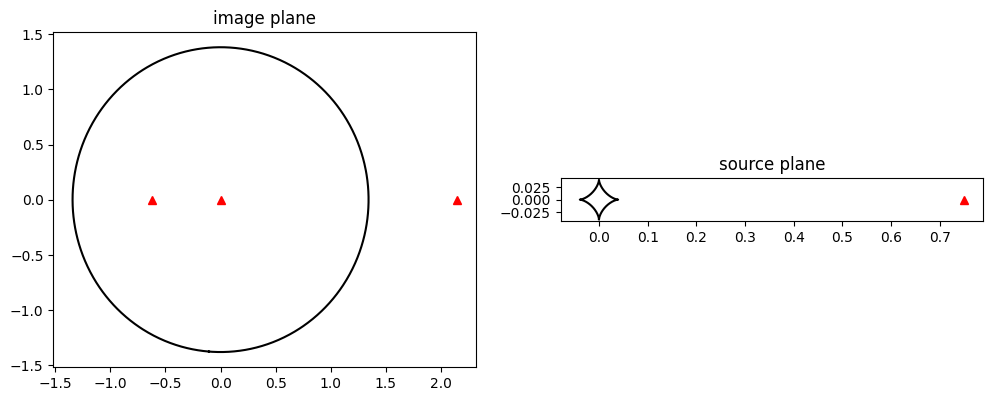

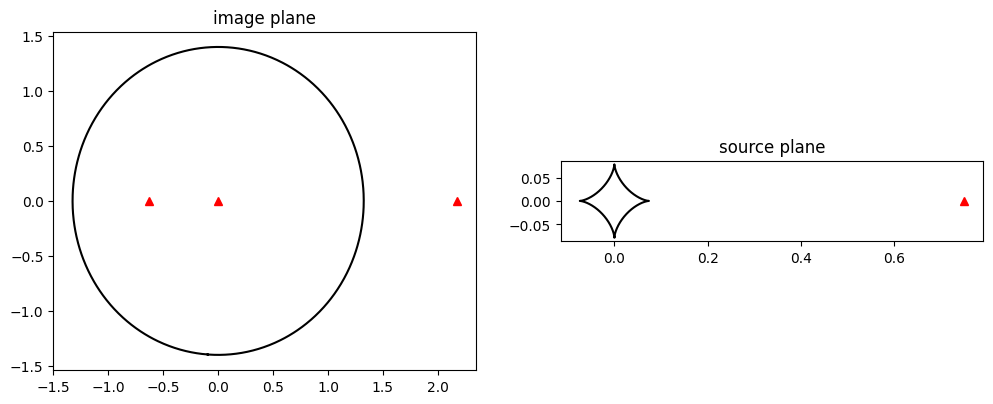

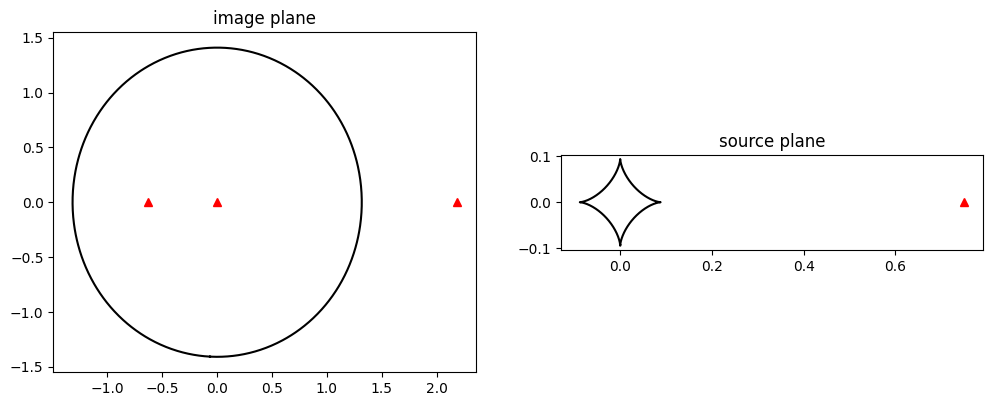

In [4]:
betaOne = 0.75
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.1, num_mock))

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    for j in range(num_mock):
        plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsArr[i]], gammac=shear_vals[j])
        model_iso = gl.lensmodel([plane_iso])
        model_iso.tile()
        imgarr,muarr,tarr = model_iso.findimg(betaArray)
        # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
        iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
        values.append(iso_dict)
        model_iso.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.


# notice that some arrays aren't two dimensional, and that's because of how the for loop gave the img, mu, and time delay array output.
# sometimes for loop from above gave img array but other times it gave just a singular value for the img.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Using $\gamma_s$ Instead

Here is the image array: 
 [[ 1.75448408e+00  8.25030497e-02]
 [-2.53868500e-01  1.73113191e-03]
 [-3.38122690e-06  3.19641634e-13]] 

Here is the magnification array: 
 [ 2.33046983e+00 -3.38309978e-01  7.16660858e-11] 

Here is the time delay array: 
 [0.         1.5073575  1.53958149]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.75597432e+00  1.56601716e-01]
 [-2.53715560e-01  3.29495135e-03]
 [-3.38122674e-06  5.74249825e-13]] 

Here is the magnification array: 
 [ 2.30982961e+00 -3.37616768e-01  7.16660779e-11] 

Here is the time delay array: 
 [0.         1.51120115 1.54341349]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 1.75822075e+00  2.23175959e-01]
 [-2.53493822e-01  4.71345786e-03]
 [-3.38122684e-06  8.44781232e-13]] 

Here is the magnification array: 
 [ 2.28147718e+00 -3.36614389e-01  7.16660828e-11] 

Here is the time delay array: 
 [0.         1.51677129 1

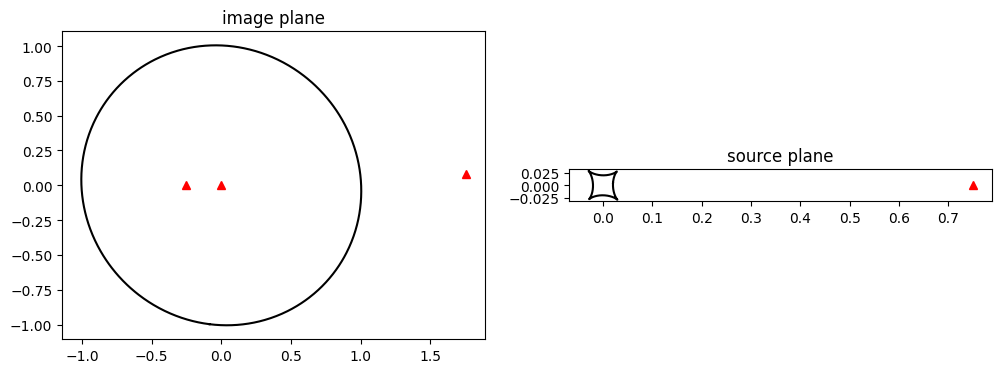

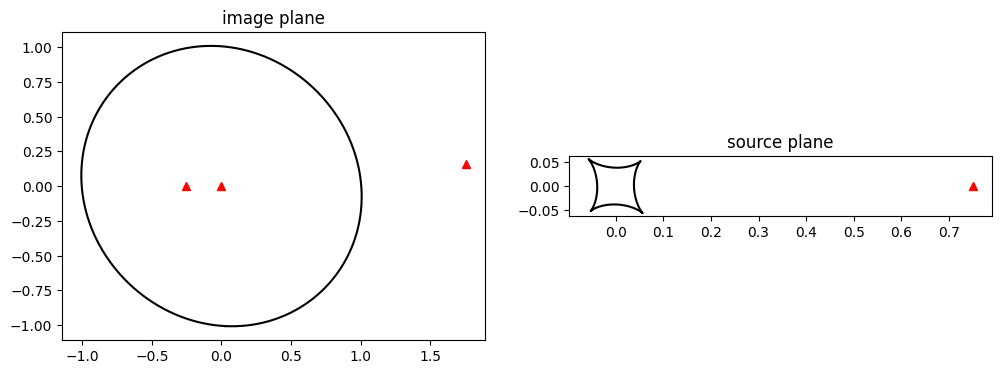

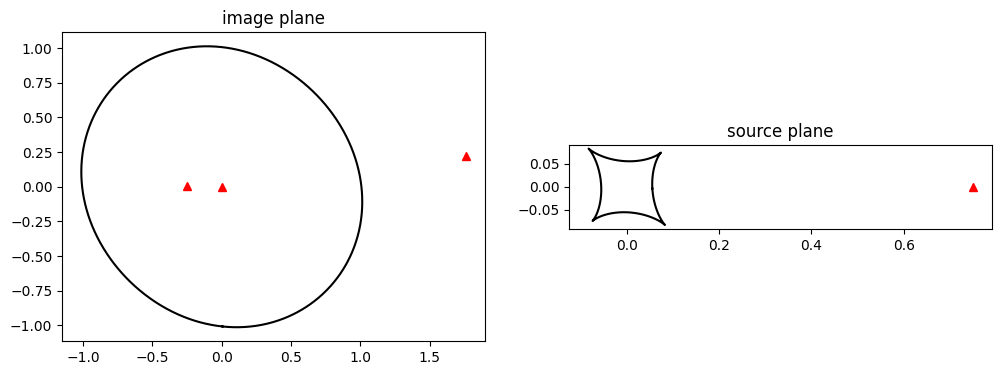

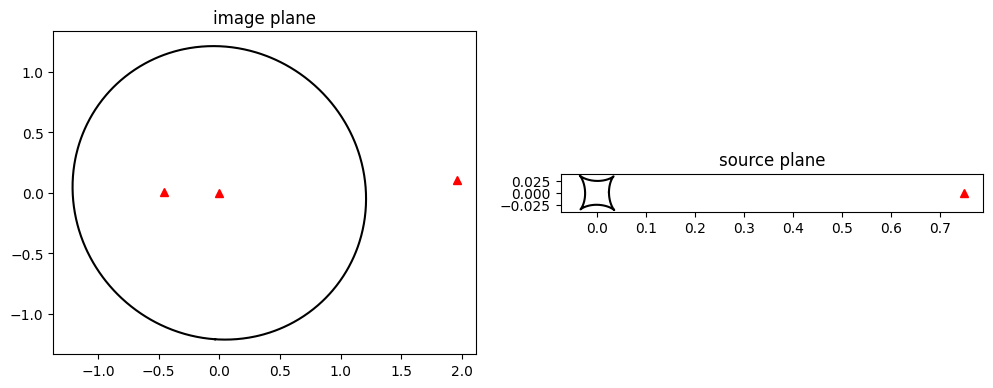

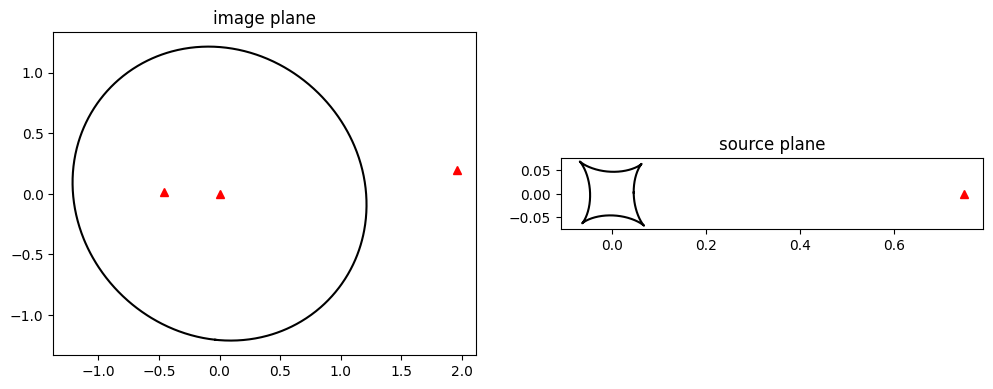

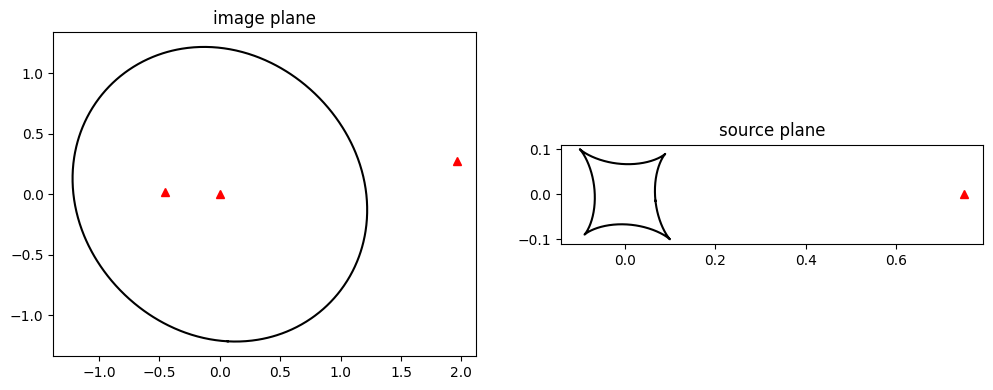

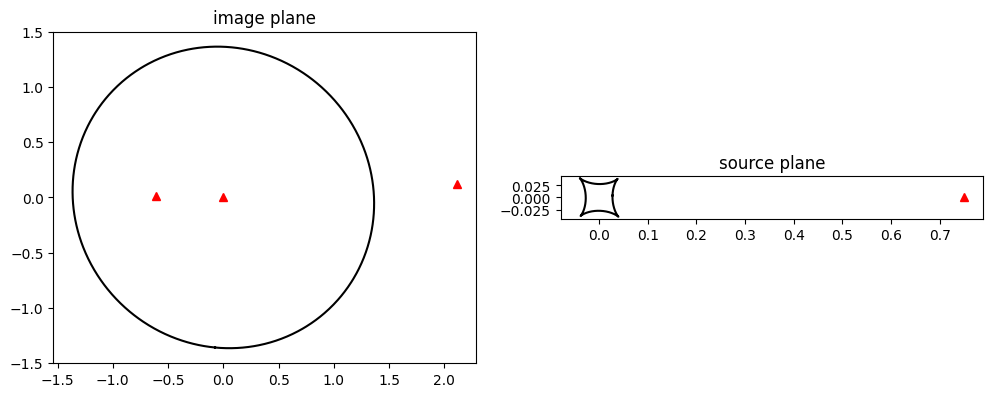

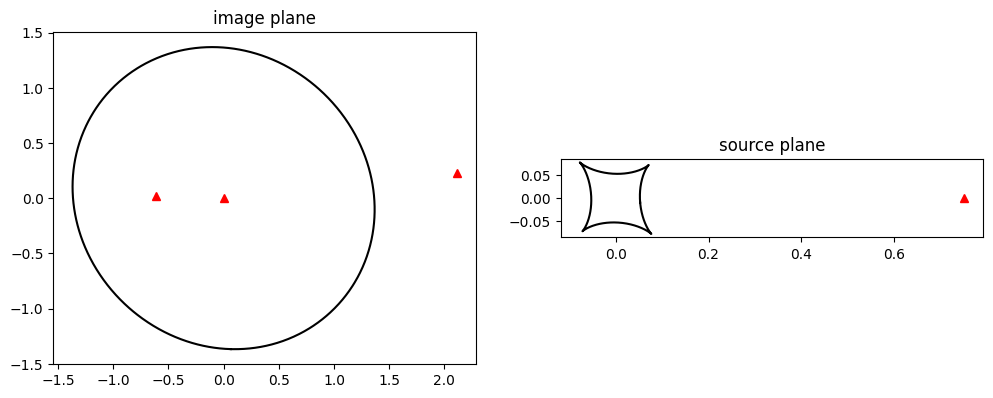

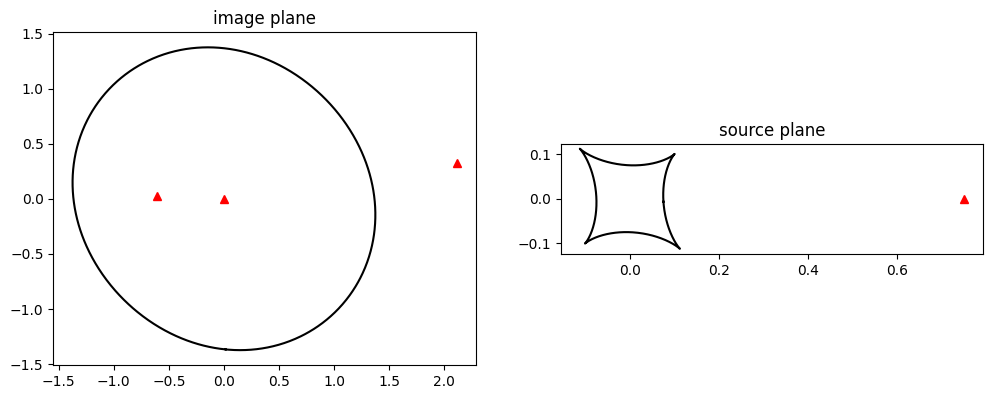

In [5]:
# Using SIS Model to Generate Lenses for Training Data
betaOne = 0.75
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.1, num_mock))

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    for j in range(num_mock):
        plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsArr[i]], gammas=shear_vals[j])
        model_iso = gl.lensmodel([plane_iso])
        model_iso.tile()
        imgarr,muarr,tarr = model_iso.findimg(betaArray)
        # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
        iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
        values.append(iso_dict)
        model_iso.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

# notice that some arrays aren't two dimensional, and that's because of how the for loop gave the img, mu, and time delay array output.
# sometimes for loop from above gave img array but other times it gave just a singular value for the img.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Holding Einstein Radius Constant (with Changing Shear)

[0.15201154 0.25220201 0.27068915]
Here is the image array: 
 [[ 1.17926033e+00  7.27456591e-09]
 [-1.17926033e+00  5.79458369e-09]
 [ 1.53533209e-08  8.68045860e-01]
 [ 3.81138203e-08 -8.68045859e-01]
 [ 6.70096156e-15 -4.13658420e-15]] 

Here is the magnification array: 
 [ 3.87885790e+00  3.87885794e+00 -2.85520379e+00 -2.85520378e+00
  4.00001600e-12] 

Here is the time delay array: 
 [0.00000000e+00 4.98520258e-09 1.55606927e-01 1.55606927e-01
 5.89616376e-01]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[-1.33725856e+00  1.16123999e-08]
 [ 1.33725854e+00 -2.71492138e-09]
 [ 1.49163331e-09 -7.98592185e-01]
 [ 1.49163363e-09  7.98592185e-01]
 [-7.29042875e-15  2.97722447e-15]] 

Here is the magnification array: 
 [ 2.65116943e+00  2.65116948e+00 -1.58324306e+00 -1.58324306e+00
  4.00001600e-12] 

Here is the time delay array: 
 [0.00000000e+00 1.66454451e-08 2.69332677e-01 2.69332677e-01
 6.68615370e-01]

----------------------

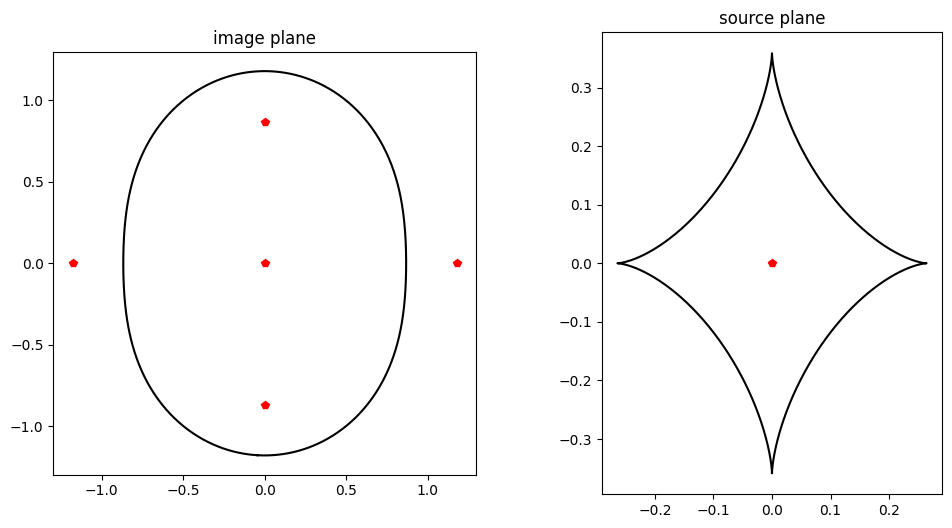

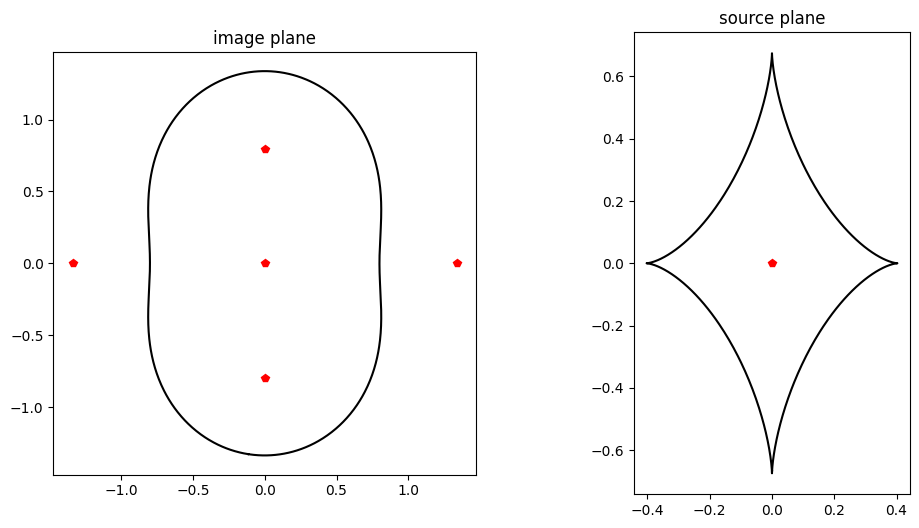

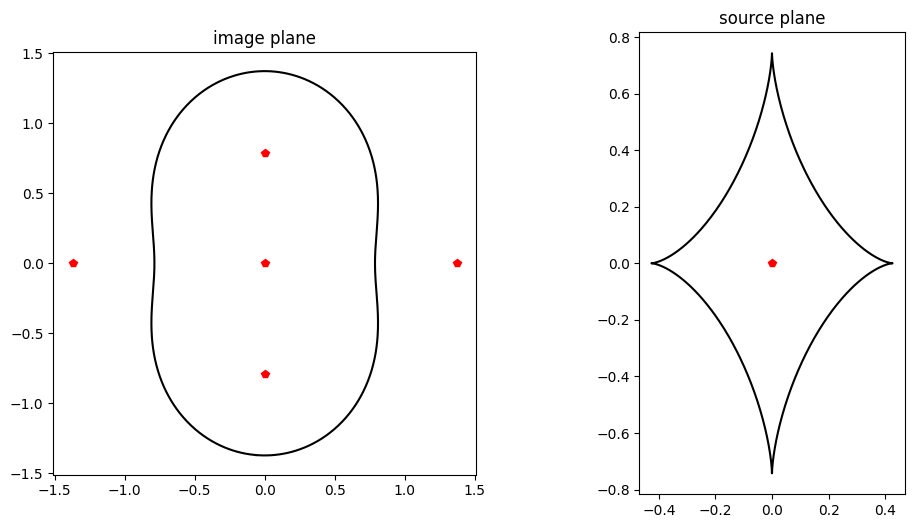

In [6]:
# generates random einstein radii every time this is called... could pose an error
EinsVal = 1.0

# Using SIS Model to Generate Lenses for Training Data
betaOne = 0
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.3 (larger bc i wanted the change to be clear), same size as eins array
shear_vals = np.sort(np.random.uniform(0, 0.3, num_mock)) #print out the list
print(shear_vals)

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

# use model.findimg and pass it the beta values to find image pos
# need to find source positions and give the model source positions to find images.
for j in range(num_mock):
    plane_iso = gl.lensplane('SIS', [0.0, 0.0, EinsVal], gammac=shear_vals[j])
    model_iso = gl.lensmodel([plane_iso])
    model_iso.tile()
    imgarr,muarr,tarr = model_iso.findimg(betaArray)
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    iso_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(iso_dict)
    model_iso.plot(src=betaArray)# plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Elliptical Power Law Effects vs. Shear

[0.07751081 0.4216692  0.42657983]


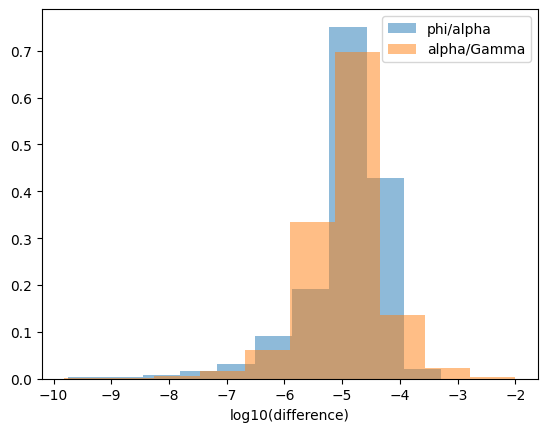

c:\Users\satya\Documents\GravLensing\pygravlens.py:1571: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


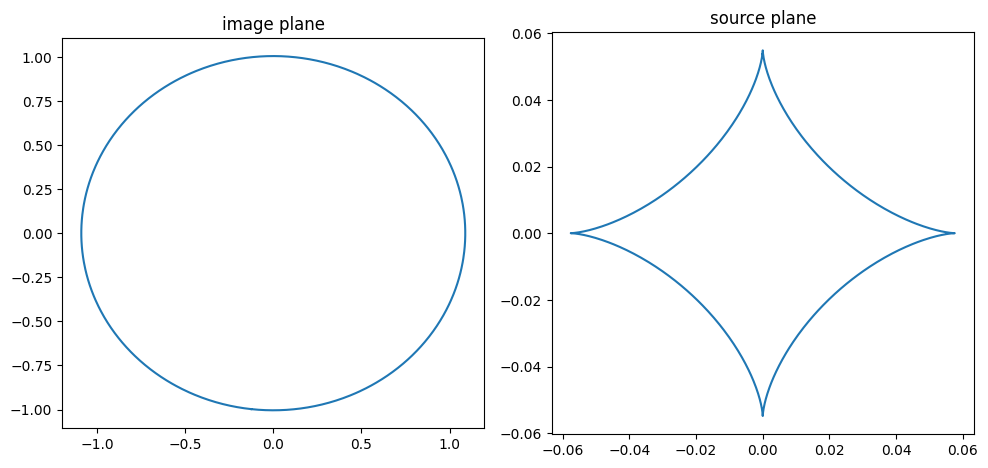

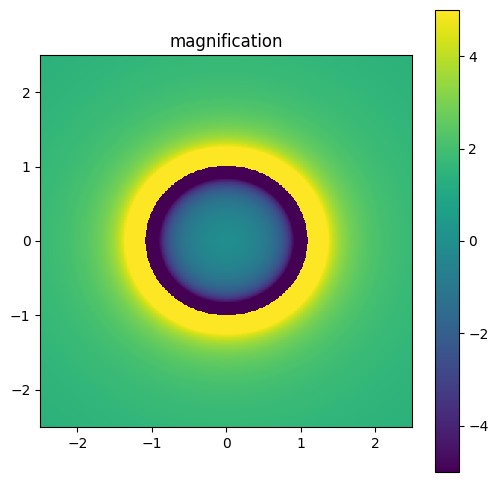

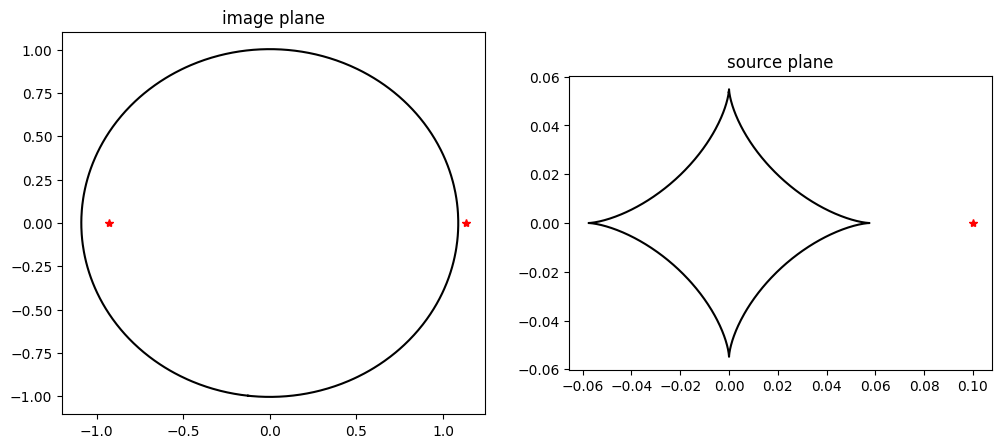

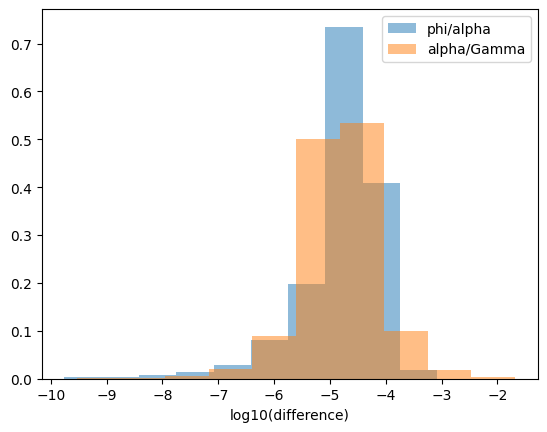

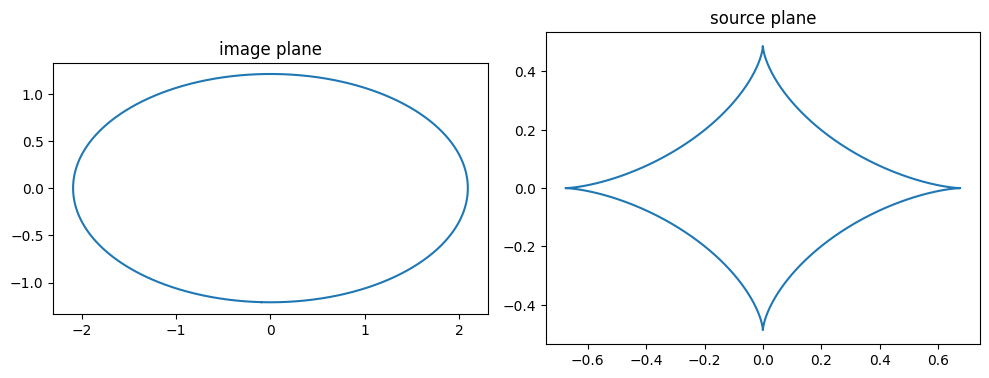

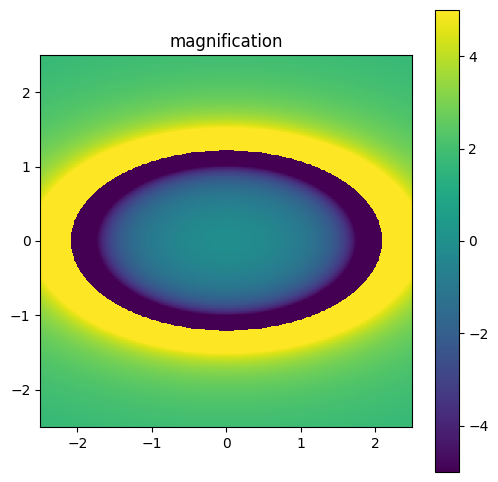

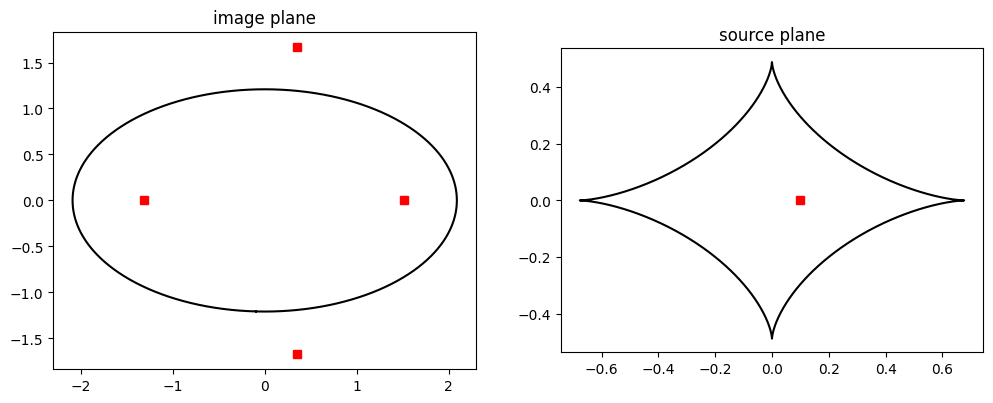

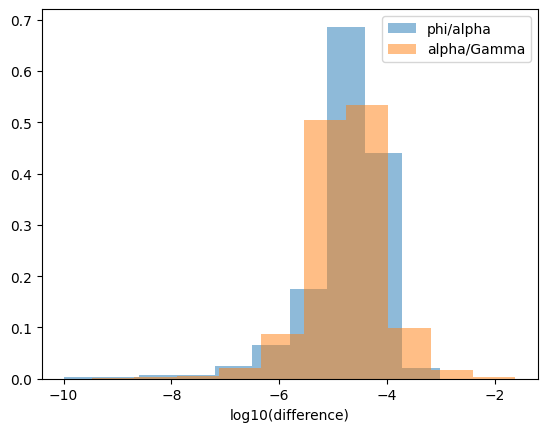

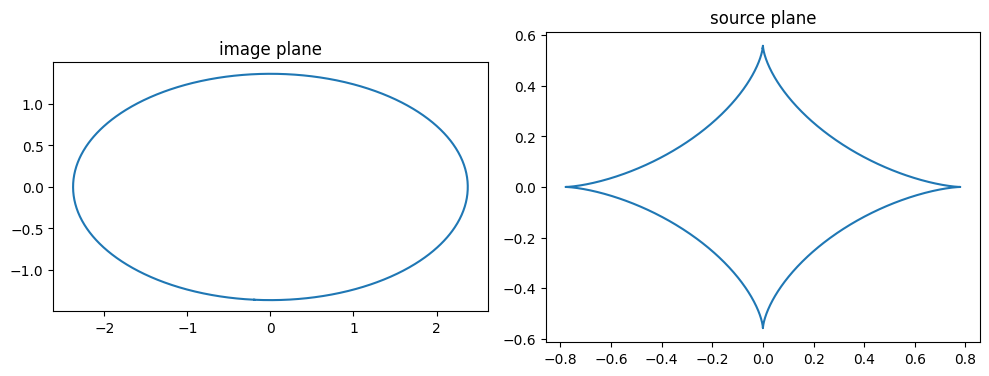

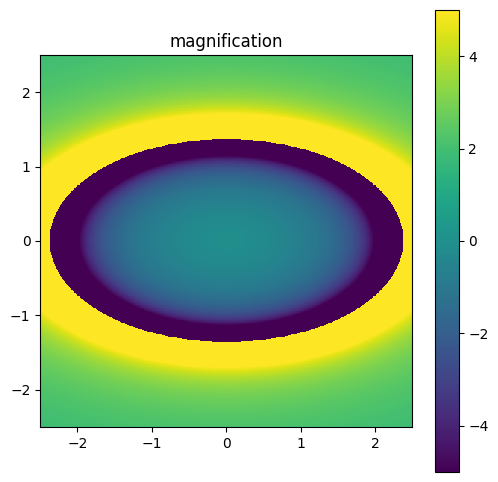

Here is the image array: 
 [[ 1.13070104e+00  2.48108877e-08]
 [-9.30701036e-01  2.04010252e-11]] 

Here is the magnification array: 
 [26.6570679  -5.90608363] 

Here is the time delay array: 
 [0.         0.20614022]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 3.47286476e-01 -1.67000346e+00]
 [ 3.47286476e-01  1.67000346e+00]
 [ 1.51390940e+00  3.79312970e-09]
 [-1.31390940e+00 -1.31799878e-09]] 

Here is the magnification array: 
 [ 3.55539096  3.55539096 -2.62607818 -1.69211242] 

Here is the time delay array: 
 [0.00000000e+00 8.88178420e-16 3.08798888e-01 5.91580768e-01]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[ 3.43436667e-01  1.89826457e+00]
 [ 3.43436652e-01 -1.89826457e+00]
 [ 1.69676820e+00  3.75842171e-09]
 [-1.49676820e+00 -1.17941148e-08]] 

Here is the magnification array: 
 [ 3.49566881  3.49566881 -2.4976945  -1.70216164] 

Here is the time delay array:

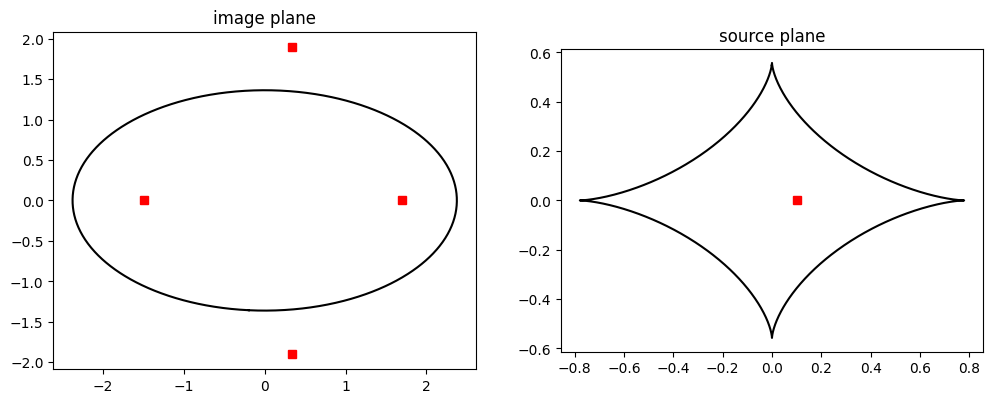

In [7]:
# Using SIS Model to Generate Lenses for Training Data
betaOne = 0.1
betaTwo = 0.0 # choose
betaArray= [betaOne, betaTwo] 

# array of randomized shear vals between 0 and 0.1, same size as eins array
ellip_vals = np.sort(np.random.uniform(0, 0.5, num_mock))
print(ellip_vals)

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []


xtmp_elpow = np.random.uniform(low=-2,high=2,size=(1000,2))

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    plane_elpow = gl.lensplane('ellpow',[0.0,0.0,1.0,EinsArr[i],ellip_vals[i],0]) # 3rd param = 1.0 for SIS (power law index); 4th param = einsradius; 5th param = shear
    plane_elpow.check(xtmp_elpow)

    model_elpow = gl.lensmodel([plane_elpow])
    model_elpow.tile()
    model_elpow.plotcrit()
    model_elpow.plotmag()

    imgarr,muarr,tarr = model_elpow.findimg(betaArray)
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    elpow_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(elpow_dict)

    model_elpow.plot(src=betaArray) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')

### Random vals for Source Positions

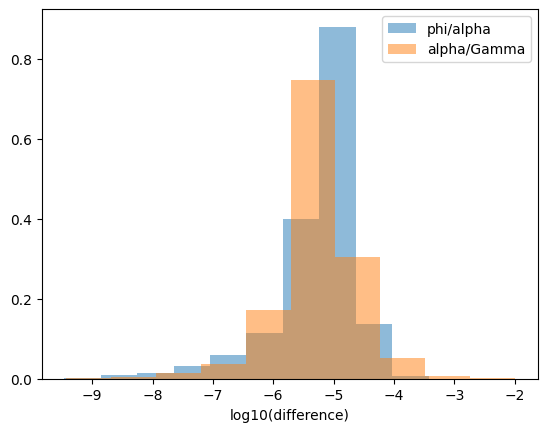

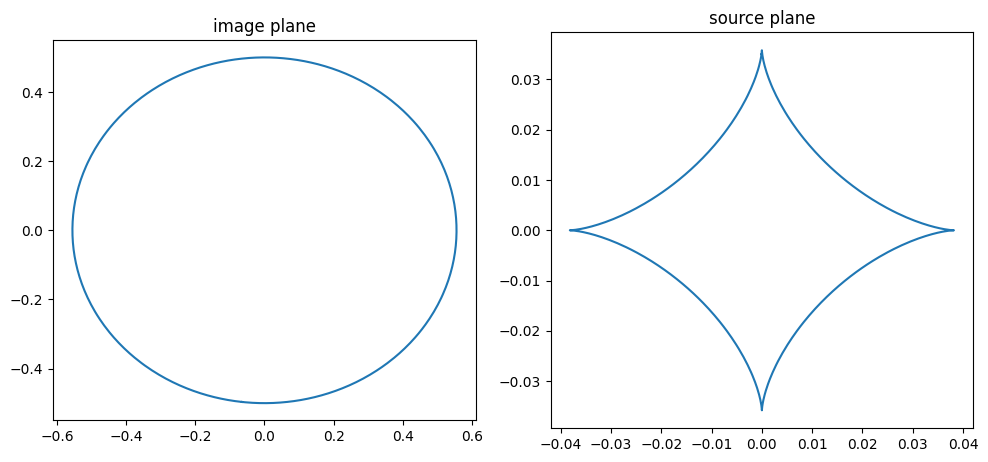

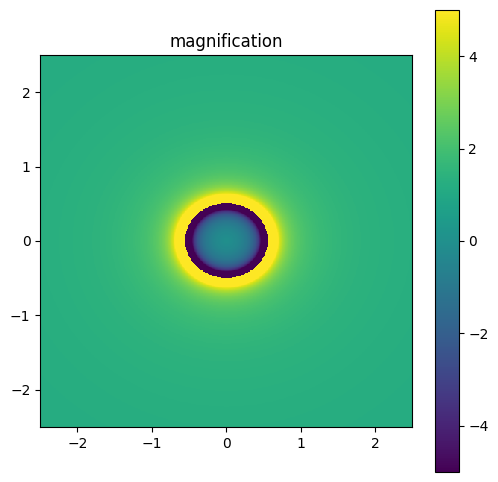

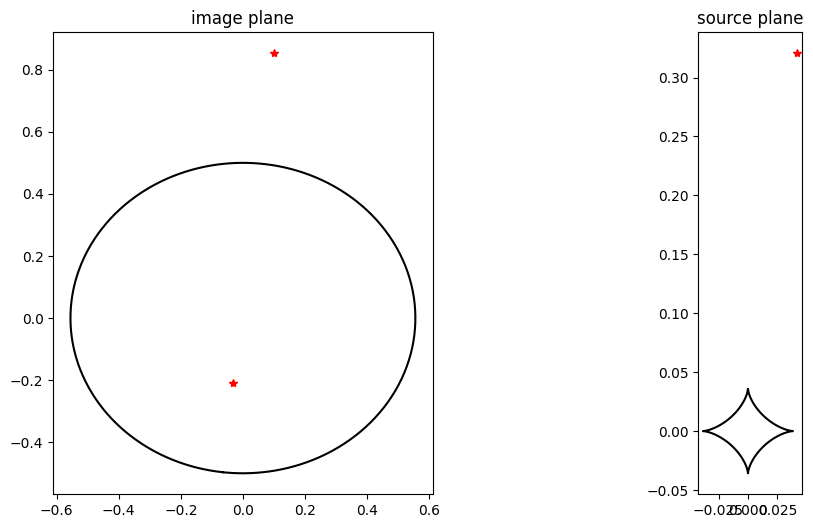

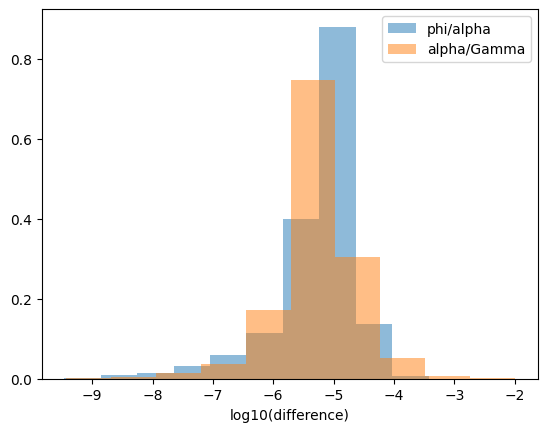

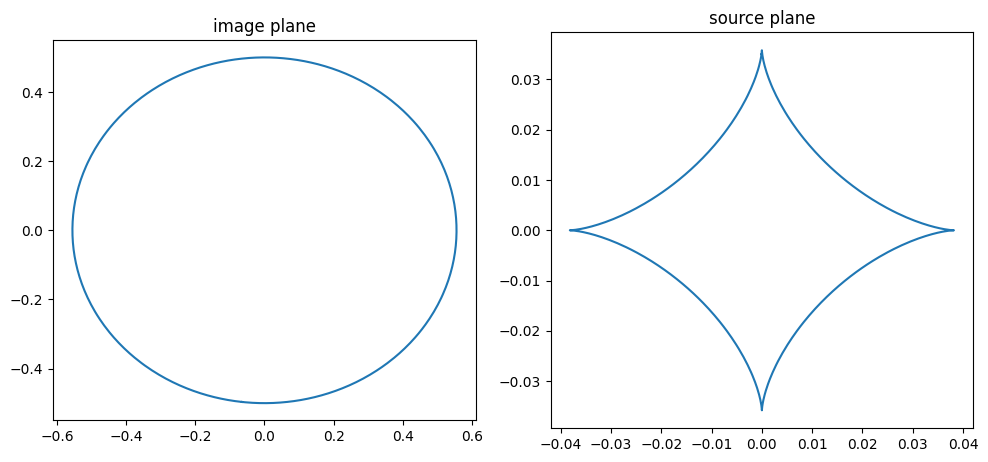

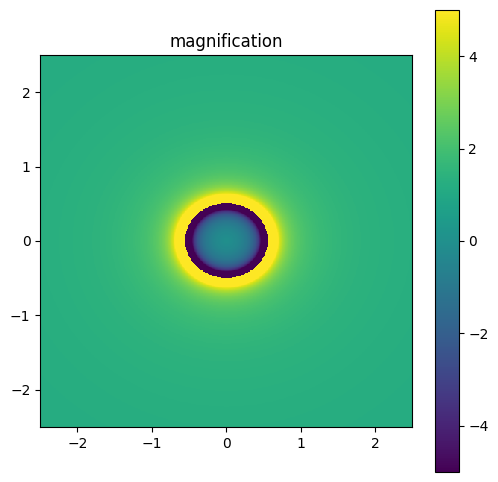

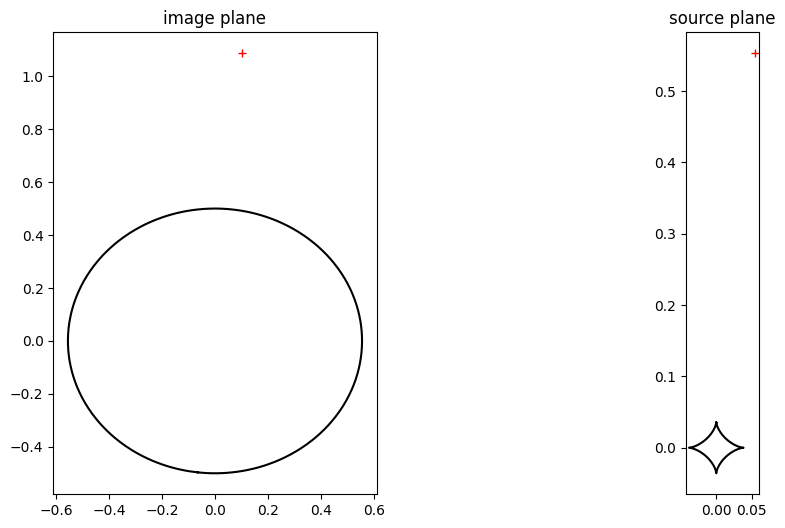

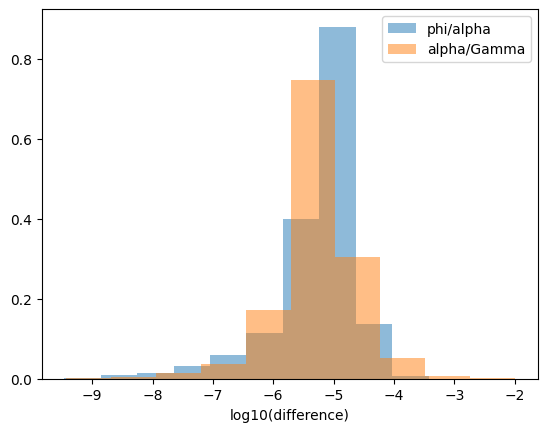

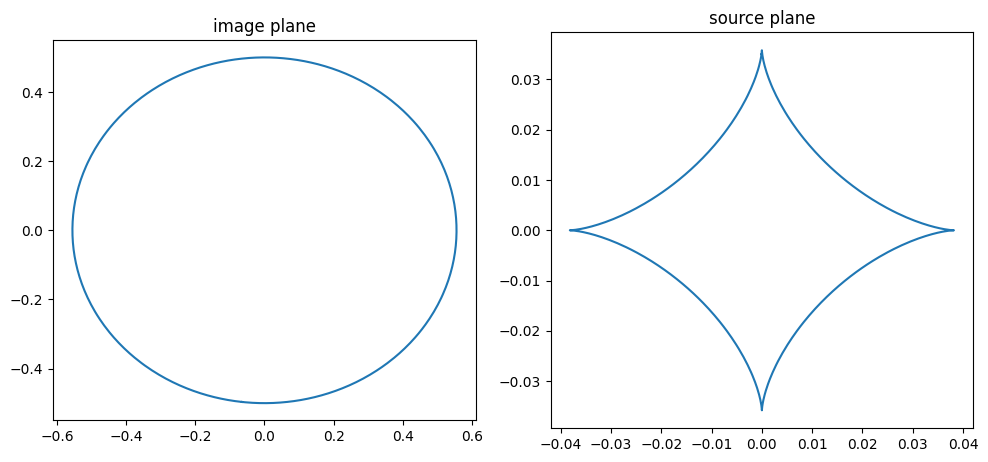

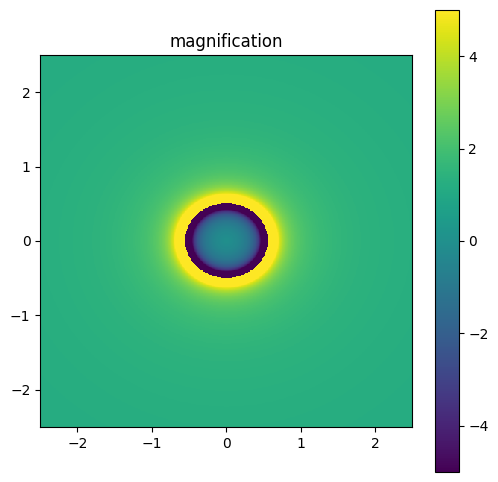

Here is the image array: 
 [[ 0.10048761  0.85299902]
 [-0.03090376 -0.20993335]] 

Here is the magnification array: 
 [ 2.39750686 -0.73471243] 

Here is the time delay array: 
 [0.         0.34633902]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[0.10148404 1.08664745]] 

Here is the magnification array: 
 [1.84676988] 

Here is the time delay array: 
 [0.]

----------------------------Next Mock Lens----------------------------
Here is the image array: 
 [[0.69986304 1.06271113]] 

Here is the magnification array: 
 [1.67994457] 

Here is the time delay array: 
 [0.]

----------------------------Next Mock Lens----------------------------


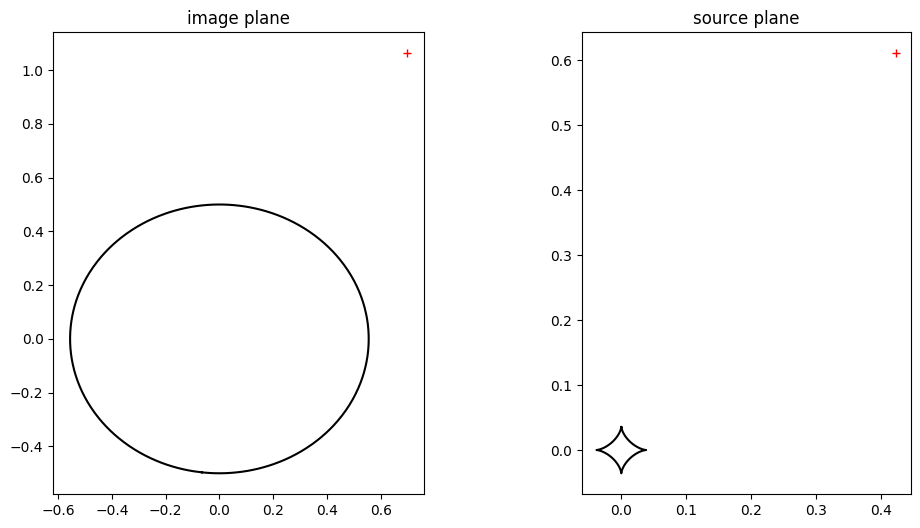

In [8]:
# Using SIS Model to Generate Lenses for Training Data

circ_num = np.sqrt(2) / 2

betaOne = np.sort(np.random.uniform(0.0, circ_num, num_mock))
betaTwo = np.sort(np.random.uniform(0.0, circ_num, num_mock)) # choose

keys = range(num_mock) # key pairs created for size of EinsArr = number of mock lenses
values = []

xtmp_elpow = np.random.uniform(low=-2,high=2,size=(1000,2))

# for loop for creating a dictionary with an array of all the img, magnificaiton, and source arrays

for i in range(num_mock):
    # use model.findimg and pass it the beta values to find image pos
    # need to find source positions and give the model source positions to find images.
    plane_elpow = gl.lensplane('ellpow',[0,0,1.0,0.5,0.1,0]) # 3rd param = 1.0 for SIS (power law index); 4th param = einsradius; 5th param = shear
    plane_elpow.check(xtmp_elpow)

    model_elpow = gl.lensmodel([plane_elpow])
    model_elpow.tile()
    model_elpow.plotcrit()
    model_elpow.plotmag()
    
    
    imgarr,muarr,tarr = model_elpow.findimg([betaOne[i],betaTwo[i]])
    # values is a 2d array containing the img positions, magnifications, and time delay of each einstein radius.
    elpow_dict = dict(img=imgarr, mu=muarr, time=tarr)
    values.append(elpow_dict)

    model_elpow.plot(src=[betaOne[i],betaTwo[i]]) # plots the images for each eins radius - used this check if the code was working
# assigns values to each key, each key represents the 
# index of the Einstein Radius in the Einstein Radius array 
# to which the specific img positons, magnifications, and time delays correspond to.

for diction in values:
    print('Here is the image array: \n', diction["img"], '\n')
    print('Here is the magnification array: \n', diction["mu"], '\n')
    print('Here is the time delay array: \n', diction["time"])
    print()
    print('----------------------------Next Mock Lens----------------------------')
    


In [4]:
shear = np.load('valShear.npy', allow_pickle = True)
ellip = np.load('valShear.npy', allow_pickle = True)
both = np.load('valShear.npy', allow_pickle = True)

In [5]:
print(len(shear),len(ellip), len(both))

10 10 10
